<h1> Car Price Prediction </h1>

Refrence: https://www.business-standard.com/article/news-cd/myth-busted-should-you-buy-a-used-car-based-only-on-kilometres-driven-116051101185_1.html

https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats

In [3]:
df = pd.read_csv("E:\Sem-5\ML\car.csv",index_col= 0)

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [6]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
df.drop('New_Price',inplace=True,axis=1)

In [8]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [9]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats', ylabel='count'>

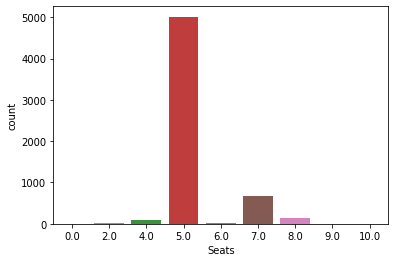

In [10]:
sns.countplot('Seats',data=df)

In [11]:
def removaNaSeats(col):
    value = col[0]
    if pd.isnull(value):
        return 5
    else:
        return value

In [12]:
df['Seats'] = df[['Seats']].apply(removaNaSeats,axis=1)

In [13]:
df['Seats'].isnull().sum()

0

In [14]:
def removeUnit(col):
    value = col[0]
    if not pd.isnull(value):
        new_value = value.split()
        if new_value[0] == 'null':
            return np.nan
        else:
            return float(new_value[0])
    else:
        return np.nan

In [15]:
def removeUnitNew(col):
    value = col[0]
    if not pd.isnull(value):
        new_value = value.split()
        if new_value[0] != 0.0:
            if new_value[-1] == 'km/kg':
                get_value = float(new_value[0])*1.40
                return get_value
            else:
                return float(new_value[0])
        else:
            return np.nan
    else:
        return np.nan

In [16]:
df['Mileage'] = df[['Mileage']].apply(removeUnitNew,axis=1)

In [17]:
df['Engine'] = df[['Engine']].apply(removeUnit,axis=1)

In [18]:
df['Power'] = df[['Power']].apply(removeUnit,axis=1)

In [19]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 740.3+ KB


In [21]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

In [22]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)

In [23]:
df['Engine'].fillna(df['Engine'].mean(), inplace=True)

In [24]:
df['Power'].fillna(df['Power'].mean(), inplace=True)

In [25]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 740.3+ KB


In [27]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

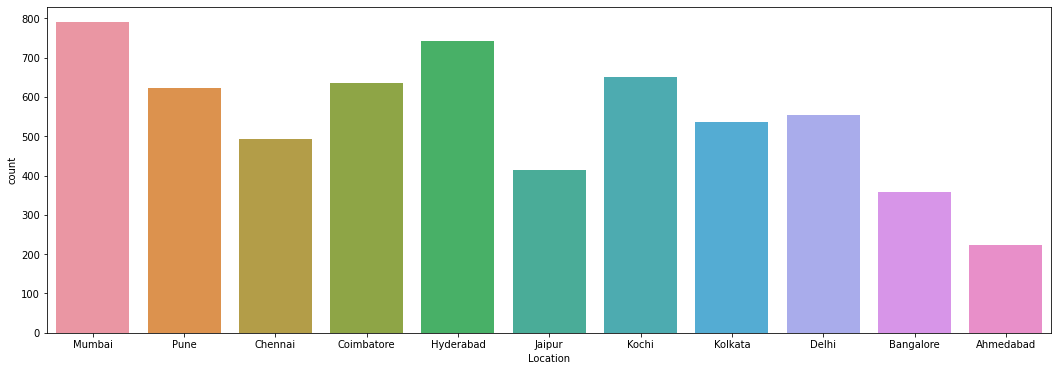

In [28]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot('Location',data=df,ax=ax)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

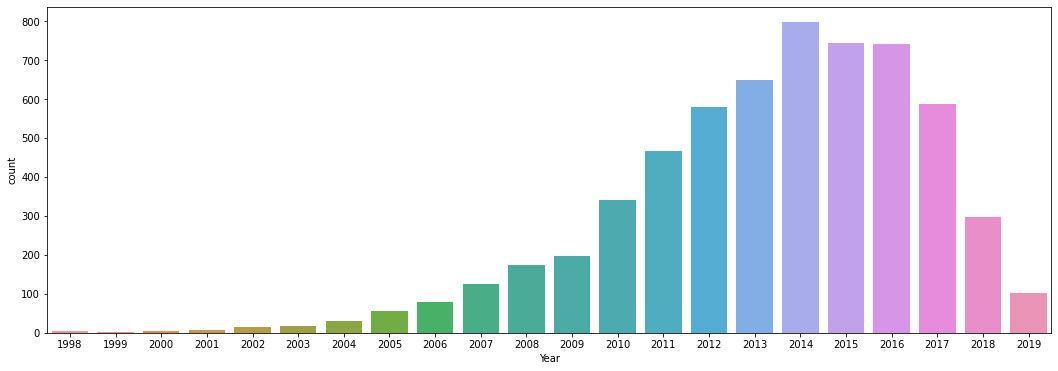

In [29]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot('Year',data=df,ax=ax)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

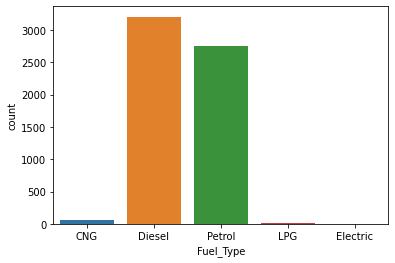

In [30]:
sns.countplot('Fuel_Type',data=df)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

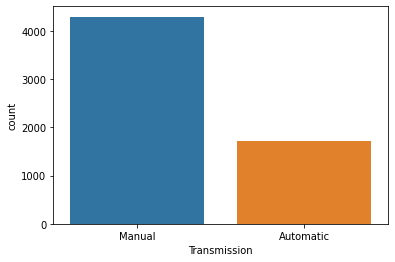

In [31]:
sns.countplot('Transmission',data=df)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

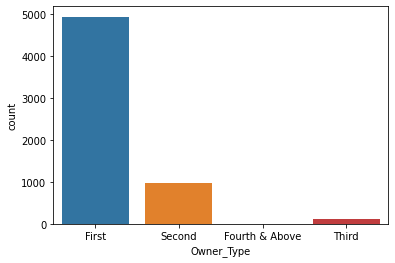

In [32]:
sns.countplot('Owner_Type',data=df)

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

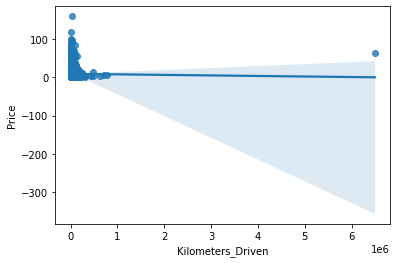

In [33]:
sns.regplot(x='Kilometers_Driven',y='Price',data=df)

In [34]:
df['Kilometers_Driven'] = df['Kilometers_Driven']/df['Kilometers_Driven'].max()

In [35]:
pearson_coef, p_value = stats.pearsonr(df['Kilometers_Driven'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.011492790740116166  with a P-value of P = 0.37267149856991005


In [36]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.011077,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,0.006308,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,0.007077,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.013385,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,0.006257,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

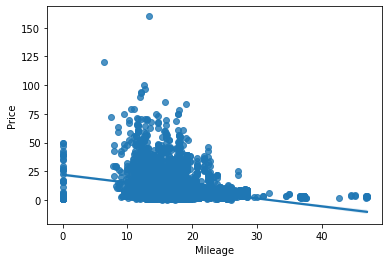

In [37]:
sns.regplot(x='Mileage',y='Price',data=df)

In [38]:
pearson_coef, p_value = stats.pearsonr(df['Mileage'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.3000669953098603  with a P-value of P = 1.7889315019138376e-125


<AxesSubplot:xlabel='Engine', ylabel='Price'>

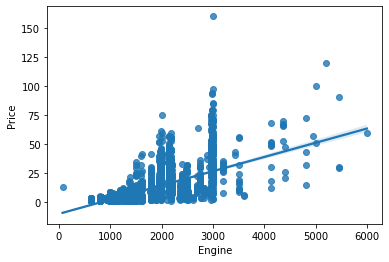

In [39]:
sns.regplot(x='Engine',y='Price',data=df)

In [40]:
pearson_coef, p_value = stats.pearsonr(df['Engine'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6571175434760663  with a P-value of P = 0.0


<AxesSubplot:xlabel='Power', ylabel='Price'>

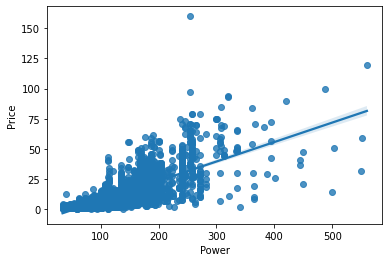

In [41]:
sns.regplot(x='Power',y='Price',data=df)

In [42]:
pearson_coef, p_value = stats.pearsonr(df['Power'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.7673308399270674  with a P-value of P = 0.0


<AxesSubplot:xlabel='Seats', ylabel='Price'>

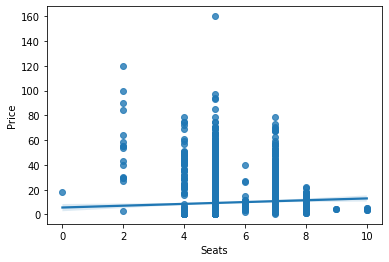

In [43]:
sns.regplot(x='Seats',y='Price',data=df)

In [44]:
pearson_coef, p_value = stats.pearsonr(df['Seats'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.05281148439920757  with a P-value of P = 4.145062552107865e-05


<AxesSubplot:xlabel='Seats', ylabel='Price'>

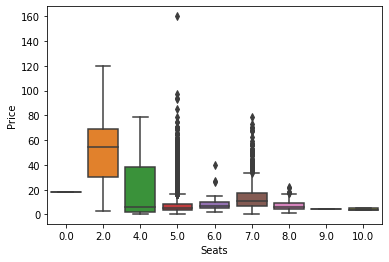

In [45]:
sns.boxplot(x='Seats',y='Price',data=df)

In [46]:
a = df['Name'].value_counts()

In [47]:
a

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

In [48]:
f = dict(a)

In [49]:
lst = []

for i,j in f.items():
    if j <= 7:
        lst.append(i)
        
print(len(lst))

1702


In [50]:
def removeOutlierName(col):
    value = col[0]
    if value in lst:
        return np.nan
    else:
        return value

In [51]:
df['Name'] = df[['Name']].apply(removeOutlierName,axis=1)

In [52]:
df.isnull().sum()

Name                 3655
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                   0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Toyota Innova 2.5 V Diesel 8-seater     8
Chevrolet Cruze LTZ AT                  8
Maruti Ritz VXi                         8
Mercedes-Benz E-Class 280 CDI           8
Maruti Ciaz ZDi Plus SHVS               8
Name: Name, Length: 174, dtype: int64

In [55]:
df['Seats'].value_counts()

5.0    2044
7.0     287
8.0      29
4.0       4
Name: Seats, dtype: int64

In [56]:
def reomveOutlierSeats(col):
    value = col[0]
    if value in [4.0]:
        return np.nan
    else:
        return value    

In [57]:
df['Seats'] = df[['Seats']].apply(reomveOutlierSeats,axis=1)

In [58]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                4
Price                0
dtype: int64

In [59]:
df.dropna(inplace=True)

In [60]:
df['Seats'].isnull().sum()

0

In [61]:
pearson_coef, p_value = stats.pearsonr(df['Seats'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.23100637797535703  with a P-value of P = 5.869458448769589e-30


In [62]:
pearson_coef, p_value = stats.pearsonr(df['Year'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.314851813986258  with a P-value of P = 1.8262411692935473e-55


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

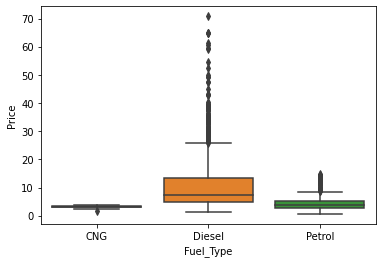

In [63]:
sns.boxplot(x='Fuel_Type',y='Price',data=df)

In [64]:
df['Fuel_Type'].value_counts()

Diesel    1271
Petrol    1071
CNG         18
Name: Fuel_Type, dtype: int64

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

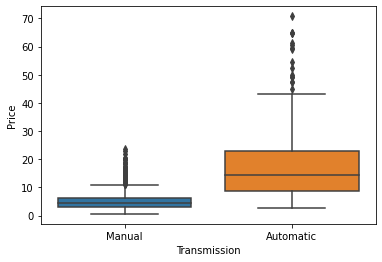

In [65]:
sns.boxplot(x='Transmission',y='Price',data=df)

In [66]:
df['Transmission'].value_counts()

Manual       1890
Automatic     470
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

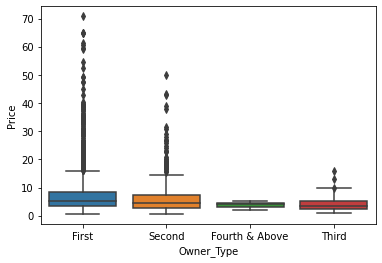

In [67]:
sns.boxplot(x='Owner_Type',y='Price',data=df)

In [68]:
df['Owner_Type'].value_counts()

First             1966
Second             359
Third               32
Fourth & Above       3
Name: Owner_Type, dtype: int64

In [69]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.339443,0.185525,-0.005066,0.043983,0.020925,0.314852
Kilometers_Driven,-0.339443,1.000000,-0.094160,0.217470,0.080260,0.233017,-0.073885
Mileage,0.185525,-0.094160,1.000000,-0.653340,-0.539429,-0.432879,-0.396077
Engine,-0.005066,0.217470,-0.653340,1.000000,0.862781,0.613239,0.697162
Power,0.043983,0.080260,-0.539429,0.862781,1.000000,0.314566,0.787831
Seats,0.020925,0.233017,-0.432879,0.613239,0.314566,1.000000,0.231006
Price,0.314852,-0.073885,-0.396077,0.697162,0.787831,0.231006,1.000000


In [70]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.011077,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,0.006308,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
3,Maruti Ertiga VDI,Chennai,2012,0.013385,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
8,Volkswagen Vento Diesel Comfortline,Pune,2013,0.009912,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
12,Maruti Swift VDI BSIV,Jaipur,2015,0.009911,Diesel,Manual,First,25.20,1248.0,74.00,5.0,5.60


<AxesSubplot:xlabel='Year', ylabel='Kilometers_Driven'>

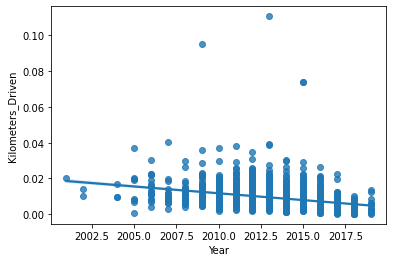

In [71]:
sns.regplot(x='Year',y='Kilometers_Driven',data=df)

In [72]:
def removeOutlierOwner(col):
    value = col[0]
    if value == "Fourth & Above":
        return np.nan
    else:
        return value 

In [73]:
df['Owner_Type'] = df[['Owner_Type']].apply(removeOutlierOwner,axis=1)

In [74]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           3
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [75]:
df.dropna(inplace=True)

In [76]:
Fuel_Type_Dummies = pd.get_dummies(df['Fuel_Type'],drop_first=True)

In [77]:
Fuel_Type_Dummies.head()

,Diesel,Petrol
0,0,0
1,1,0
3,1,0
8,1,0
12,1,0


In [78]:
Transmission_Dummies = pd.get_dummies(df['Transmission'],drop_first=True)

In [79]:
Transmission_Dummies.head()

,Manual
0,1
1,1
3,1
8,1
12,1


In [80]:
df['Owner_Type'].value_counts()

First     1966
Second     359
Third       32
Name: Owner_Type, dtype: int64

In [81]:
def ordinalValue(col):
    value = col[0]
    if value == "First":
        return 0
    elif value == "Second":
        return 1
    else:
        return 2

In [82]:
df['Owner_Type'] = df[['Owner_Type']].apply(ordinalValue,axis=1)

In [83]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.011077,CNG,Manual,0,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,0.006308,Diesel,Manual,0,19.67,1582.0,126.20,5.0,12.50
3,Maruti Ertiga VDI,Chennai,2012,0.013385,Diesel,Manual,0,20.77,1248.0,88.76,7.0,6.00
8,Volkswagen Vento Diesel Comfortline,Pune,2013,0.009912,Diesel,Manual,0,20.54,1598.0,103.60,5.0,5.20
12,Maruti Swift VDI BSIV,Jaipur,2015,0.009911,Diesel,Manual,0,25.20,1248.0,74.00,5.0,5.60


In [84]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 0 to 6017
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2357 non-null   object 
 1   Location           2357 non-null   object 
 2   Year               2357 non-null   int64  
 3   Kilometers_Driven  2357 non-null   float64
 4   Fuel_Type          2357 non-null   object 
 5   Transmission       2357 non-null   object 
 6   Owner_Type         2357 non-null   int64  
 7   Mileage            2357 non-null   float64
 8   Engine             2357 non-null   float64
 9   Power              2357 non-null   float64
 10  Seats              2357 non-null   float64
 11  Price              2357 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 239.4+ KB


In [86]:
df['Location'].value_counts()

Hyderabad     300
Mumbai        265
Coimbatore    256
Kolkata       248
Delhi         248
Kochi         235
Pune          222
Chennai       183
Jaipur        170
Bangalore     132
Ahmedabad      98
Name: Location, dtype: int64

In [87]:
a = df['Name'].value_counts()

In [88]:
f = dict(a)

In [89]:
lst = []

for i,j in f.items():
    if j <= 4:
        lst.append(i)
        
print(len(lst))

1


In [90]:
df['Name'] = df[['Name']].apply(removeOutlierName,axis=1)

In [91]:
cnt = 0
for i in a:
    if i <= 4:
        cnt = cnt + i
        
print(cnt)

4


In [92]:
north = ['Delhi']
east = ['Kolkata']
south = ['Coimbatore','Hyderabad','Banglore','kochi','Chennai']
west = ['Jaipur','Ahemdabad']
center = ['Mumbai','Pune']

In [93]:
def locationTORegion(col):
    value = col[0]
    if value in north:
        return 'North'
    elif value in east:
        return 'East'
    elif value in south:
        return 'South'
    elif value in west:
        return 'West'
    else:
        return 'Center'

In [94]:
df['Location'] = df[['Location']].apply(locationTORegion,axis=1)

In [95]:
df['Location'].value_counts()

Center    952
South     739
East      248
North     248
West      170
Name: Location, dtype: int64

In [96]:
location_dummies = pd.get_dummies(df['Location'])

In [97]:
location_dummies

,Center,East,North,South,West
0,1,0,0,0,0
1,1,0,0,0,0
3,0,0,0,1,0
8,1,0,0,0,0
12,0,0,0,0,1
...,...,...,...,...,...
6012,0,0,0,1,0
6013,0,0,0,1,0
6014,0,0,1,0,0
6015,0,0,0,0,1


In [98]:
Name_dummies = pd.get_dummies(df['Name'])

In [99]:
Name_dummies.head()

,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 2.0 TDI Multitronic,Audi A6 2011-2015 2.0 TDI Premium Plus,Audi Q7 3.0 TDI Quattro Premium Plus,BMW 3 Series 320d,BMW 3 Series 320d Highline,BMW 3 Series 320d Luxury Line,BMW 3 Series Luxury Line,BMW 5 Series 2013-2017 520d Luxury Line,...,Volkswagen Polo Diesel Trendline 1.2L,Volkswagen Polo GT TSI,Volkswagen Polo Petrol Comfortline 1.2L,Volkswagen Polo Petrol Highline 1.2L,Volkswagen Polo Petrol Trendline 1.2L,Volkswagen Vento 1.5 TDI Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Center,2010,0.011077,CNG,Manual,0,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Center,2015,0.006308,Diesel,Manual,0,19.67,1582.0,126.20,5.0,12.50
3,Maruti Ertiga VDI,South,2012,0.013385,Diesel,Manual,0,20.77,1248.0,88.76,7.0,6.00
8,Volkswagen Vento Diesel Comfortline,Center,2013,0.009912,Diesel,Manual,0,20.54,1598.0,103.60,5.0,5.20
12,Maruti Swift VDI BSIV,West,2015,0.009911,Diesel,Manual,0,25.20,1248.0,74.00,5.0,5.60


In [111]:
df.drop(['Name','Location','Fuel_Type','Transmission','Seats'],inplace=True,axis=1)

In [112]:
df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Price
0,2010,0.011077,0,37.24,998.0,58.16,1.75
1,2015,0.006308,0,19.67,1582.0,126.20,12.50
3,2012,0.013385,0,20.77,1248.0,88.76,6.00
8,2013,0.009912,0,20.54,1598.0,103.60,5.20
12,2015,0.009911,0,25.20,1248.0,74.00,5.60


In [113]:
new_df = pd.concat([df,Fuel_Type_Dummies,Transmission_Dummies,Name_dummies,location_dummies],axis=1)

In [114]:
new_df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Price,Diesel,Petrol,Manual,...,Volkswagen Vento 1.5 TDI Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Center,East,North,South,West
0,2010,0.011077,0,37.24,998.0,58.16,1.75,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2015,0.006308,0,19.67,1582.0,126.20,12.50,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2012,0.013385,0,20.77,1248.0,88.76,6.00,1,0,1,...,0,0,0,0,0,0,0,0,1,0
8,2013,0.009912,0,20.54,1598.0,103.60,5.20,1,0,1,...,0,1,0,0,0,1,0,0,0,0
12,2015,0.009911,0,25.20,1248.0,74.00,5.60,1,0,1,...,0,0,0,0,0,0,0,0,0,1


# Model Building

In [115]:
new_df.drop('Price',axis=1).head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Diesel,Petrol,Manual,Audi A4 2.0 TDI,...,Volkswagen Vento 1.5 TDI Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Center,East,North,South,West
0,2010,0.011077,0,37.24,998.0,58.16,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2015,0.006308,0,19.67,1582.0,126.20,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2012,0.013385,0,20.77,1248.0,88.76,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,2013,0.009912,0,20.54,1598.0,103.60,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
12,2015,0.009911,0,25.20,1248.0,74.00,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [116]:
new_df['Price'].head()

0      1.75
1     12.50
3      6.00
8      5.20
12     5.60
Name: Price, dtype: float64

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [119]:
x_train, x_test, y_train, y_test = train_test_split(new_df.drop('Price',axis=1),new_df['Price'],
                                                 test_size=0.3,random_state=101)

In [120]:
model = LinearRegression()

In [121]:
model.fit(x_train,y_train)

LinearRegression()

In [123]:
model_predict = model.predict(x_test)

In [127]:
from sklearn import metrics

In [128]:
print(metrics.mean_absolute_error(y_test,model_predict))

1.175939813121564


In [129]:
print(metrics.mean_squared_error(y_test,model_predict))

6.27318761922987


In [130]:
print(np.sqrt(metrics.mean_squared_error(y_test,model_predict)))

2.504633230481036


In [122]:
model.score(x_train,y_train)

0.9512128001190198